In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os


In [21]:
df = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')


In [22]:
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
0,2012-09-28,16,51.40,3.789,2130.57,3.82,NaN,583.90,1409.43,6.061,False,27,836.65
1,2012-10-19,16,40.59,3.750,1278.03,NaN,1.16,16.38,1395.48,5.847,False,27,852.81
2,2012-10-26,16,40.99,3.686,2285.52,20.48,NaN,201.97,1237.41,5.847,False,27,815.95
3,2010-02-19,16,21.13,2.550,NaN,NaN,NaN,NaN,NaN,7.039,False,28,266.00
4,2010-02-26,16,18.12,2.586,NaN,NaN,NaN,NaN,NaN,7.039,False,28,255.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565963,2012-08-17,16,62.07,3.545,408.10,NaN,1.10,870.38,604.80,6.061,False,27,752.11
565964,2012-08-24,16,61.44,3.558,1556.47,16.00,3.34,869.05,1691.12,6.061,False,27,703.94
565965,2012-08-31,16,64.19,3.556,8702.40,NaN,35.78,3576.08,4493.67,6.061,False,27,614.79
565966,2012-09-14,16,56.69,3.659,5323.84,NaN,9.30,1307.03,4474.84,6.061,False,27,898.63


In [4]:
df.shape

(565968, 13)

In [5]:
# Dropping the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Dropping the null rows
df = df.dropna()
df.head()
#Getting rid of space on FALSE_POSITIVES
df.replace(to_replace ="FALSE POSITIVE", 
                 value ="FALSE_POSITIVE",
          inplace=True)

In [6]:
df.shape

(149916, 13)

In [7]:
#drop other unnecesary columns 
df.drop(inplace= True,columns=[ 'fuel_price','unemployment','dept'])

In [8]:
#Sort Values by date
df.sort_values(by='sale_date', inplace= True) 

In [9]:
#use conditional to locate all rows after November 4th 2011
new_df = df.loc[df["sale_date"]> "2011-11-04" ]
new_df

,sale_date,store,temperature,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales
62,2011-11-11,16,29.56,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42
147533,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,24848.39
363402,2011-11-11,28,48.76,22860.64,12223.82,343.77,20834.37,9895.33,False,10305.28
147629,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,23011.67
147725,2011-11-11,40,40.75,10215.77,4613.06,191.71,3200.57,4230.85,False,4116.93
...,...,...,...,...,...,...,...,...,...,...
176418,2012-10-26,45,58.85,4018.91,58.08,100.00,211.94,858.33,False,1350.87
67738,2012-10-26,26,46.95,1827.16,35.87,50.00,478.93,2088.65,False,5347.21
383056,2012-10-26,31,70.50,10768.84,50.54,104.50,345.37,6629.51,False,137.84
67546,2012-10-26,26,46.95,1827.16,35.87,50.00,478.93,2088.65,False,497.03


In [10]:
# Get average of markdowns1-5 DataFrame rows (selected by index labels)
new_df['markdownmean']= new_df[[ 'markdown1', 'markdown2', 'markdown3','markdown4','markdown5'] ].mean(axis=1)

In [11]:
#Selecting wanted columns
freshy= new_df.loc[:,['markdownmean','weekly_sales','isholiday','store','temperature']] 
freshy.head()

,markdownmean,weekly_sales,isholiday,store,temperature
62,2697.742,468.42,False,16,29.56
147533,4490.392,24848.39,False,40,40.75
363402,13231.586,10305.28,False,28,48.76
147629,4490.392,23011.67,False,40,40.75
147725,4490.392,4116.93,False,40,40.75


In [ ]:
# Use Pandas get_dummies to convert categorical data

pd.get_dummies(freshy)
freshy.head()


In [26]:
############TO FIX LINEAR REGRESSION NEED TO GROUP BY SPECIFIC STORE????BUT PROGRAM WONT ALLOW
df[(df["store"]=="True")]

/Users/amandaplesa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales


In [27]:
# Set features. This will also be used as your x values.
#X values are my independent variables 
X= freshy[['store','markdownmean','isholiday']]
# Y is my Dependent variable
y= freshy[['weekly_sales']].values.reshape(-1, 1)
print(X.shape, y.shape)

(149916, 3) (149916, 1)


In [28]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler

#Creating a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [30]:
# Transforming the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [31]:
 # Creating a LinearRegression model and fitting it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

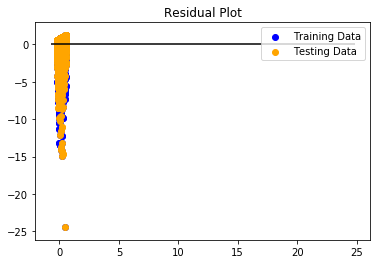

In [32]:
# Making predictions using a fitted model
# Plotting the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [33]:
 # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2


from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0001643362158532, R2: 0.01041092898498952


In [ ]:
#Variance In terms of linear regression, 
#variance is a measure of how far observed values differ from the average of predicted values,
#i.e., their difference from the predicted value mean.
#The goal is to have a value that is low. What low means is quantified by the r2 score 
#In the code below, this is np.var(err), 
#where err is an array of the differences between observed 
#and predicted values and np.var() is the numpy array variance function.

# R2= the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

In [ ]:
#MSE  MSE. Simply put, the lower the value the better and 0 means the model is perfect.
#is the average of the square of the errors.